# SpaceX: Launch Operations, Inventory & Business

SpaceX - A company credited with launching the first privately developed vehicle into the orbit; is largely responsible for kickstarting the space race yet again. Over the years it has achieved a lot of incredible feats, and in this analysis we'll look to explore SpaceX's operations; garnering insights that give us information on the subtle details behind those achievements and a general idea of the SpaceX programs.


The goal of this analysis is to discover facts which would have been missed by mainstream media coverage and to develop an understanding of the company by way of numbers. We would look towards tech blogs, enginnering , and space community posts for our analysis. We might also encounter well-known facts in our analysis which we would look at from a different perspective.


The analysis uses data from the following source: https://www.kaggle.com/rohanrao/rspacex-data

### Setup & Loading

####  Setup

In [111]:
# Importing Dependancies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

####  Data Loading

In [112]:
# Loading in each table as a dataframe

launches = pd.read_csv('launches.csv')
rockets = pd.read_csv('rockets.csv')
launchpads = pd.read_csv('launchpads.csv')
payloads = pd.read_csv('payloads.csv')
ships = pd.read_csv('ships.csv')
cores = pd.read_csv('cores.csv')
capsules = pd.read_csv('capsules.csv')

#### Data Preview Options

In [113]:
pd.options.display.max_rows = 30
pd.options.display.max_columns = 30

launches.head(10)               # Main DataFrame ; contains unique_ids of other df's
# rockets.head(10)               
# launchpads.head(10)            # Key DataFrames ; contains additional info of cols in Main df
# payloads.head(10)
# ships.head(20)
# cores.head(10)
# capsules.head(10)

,launch_id,name,date,rocket_id,launchpad_id,success,failures,ships,capsules,payloads,cores,fairings_reused,fairings_recovery_attempts,fairings_recovered
0,5eb87cd9ffd86e000604b32a,FalconSat,2006-03-24T22:30:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",[],[],['5eb0e4b5b6c3bb0006eeb1e1'],"[{'core': '5e9e289df35918033d3b2623', 'flight'...",False,False,False
1,5eb87cdaffd86e000604b32b,DemoSat,2007-03-21T01:10:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",[],[],['5eb0e4b6b6c3bb0006eeb1e2'],"[{'core': '5e9e289ef35918416a3b2624', 'flight'...",False,False,False
2,5eb87cdbffd86e000604b32c,Trailblazer,2008-08-03T03:34:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",[],[],"['5eb0e4b6b6c3bb0006eeb1e3', '5eb0e4b6b6c3bb00...","[{'core': '5e9e289ef3591814873b2625', 'flight'...",False,False,False
3,5eb87cdbffd86e000604b32d,RatSat,2008-09-28T23:15:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,True,[],[],[],['5eb0e4b7b6c3bb0006eeb1e5'],"[{'core': '5e9e289ef3591855dc3b2626', 'flight'...",False,False,False
4,5eb87cdcffd86e000604b32e,RazakSat,2009-07-13T03:35:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,True,[],[],[],['5eb0e4b7b6c3bb0006eeb1e6'],"[{'core': '5e9e289ef359184f103b2627', 'flight'...",False,False,False
5,5eb87cddffd86e000604b32f,Falcon 9 Test Flight,2010-06-04T18:45:00.000Z,5e9d0d95eda69973a809d1ec,5e9e4501f509094ba4566f84,True,[],[],[],['5eb0e4b7b6c3bb0006eeb1e7'],"[{'core': '5e9e289ef359185f2b3b2628', 'flight'...",NaN,NaN,NaN
6,5eb87cdeffd86e000604b330,COTS 1,2010-12-08T15:43:00.000Z,5e9d0d95eda69973a809d1ec,5e9e4501f509094ba4566f84,True,[],['5ea6ed2d080df4000697c901'],['5e9e2c5bf35918ed873b2664'],"['5eb0e4b9b6c3bb0006eeb1e8', '5eb0e4b9b6c3bb00...","[{'core': '5e9e289ef35918187c3b2629', 'flight'...",None,None,None
7,5eb87cdfffd86e000604b331,COTS 2,2012-05-22T07:44:00.000Z,5e9d0d95eda69973a809d1ec,5e9e4501f509094ba4566f84,True,[],['5ea6ed2d080df4000697c901'],['5e9e2c5bf3591882af3b2665'],['5eb0e4bab6c3bb0006eeb1ea'],"[{'core': '5e9e289ef35918f39c3b262a', 'flight'...",None,None,None
8,5eb87ce0ffd86e000604b332,CRS-1,2012-10-08T00:35:00.000Z,5e9d0d95eda69973a809d1ec,5e9e4501f509094ba4566f84,True,[],['5ea6ed2d080df4000697c902'],['5e9e2c5bf3591835983b2666'],"['5eb0e4bab6c3bb0006eeb1eb', '5eb0e4bab6c3bb00...","[{'core': '5e9e289ff3591821a73b262b', 'flight'...",None,None,None
9,5eb87ce1ffd86e000604b333,CRS-2,2013-03-01T19:10:00.000Z,5e9d0d95eda69973a809d1ec,5e9e4501f509094ba4566f84,True,[],['5ea6ed2d080df4000697c902'],['5e9e2c5bf359189ef23b2667'],['5eb0e4bbb6c3bb0006eeb1ed'],"[{'core': '5e9e289ff3591884e03b262c', 'flight'...",None,None,None


*Key Observations from Data Preview:*

1. There a lot of categorical features and a datetime feature stored as string. It would be useful to convert them to an approriate type for better analysis.


2. The 'id columns' in the df's which are in the form of an MD5 hash, act as lisaon to other df's. Converting them to name columns would improve comprehensiblity.


3. A lot of interelated data are stored in different tables. For example: the launches df contains the payload to be launched but the payloads df would contain the payload's manufacturers. In this scenario, it would be useful to have a function extract information from a related table.


4. Certain features hold list/array type values in the form of strings. Having them tranformed to list type would make it more efficient to work with. 

### Data Preparation

In this stage, we'll conduct some basic data cleaning procedures and work on some of the observations from the data preview stage. After this, we'll define a bunch of new features essential to our analysis. 

* Handling missing data by imputing appropriate values. 
* Converting datatypes to types that would be more suitable for analysis.
* Defining functions that would ease data tranformation and analysis. 
* Tranforming data to appropriate format for ease of reading and analysis.
* Feature Engineering - Adding and defining features essential to solving problems. 
* Variable Definition for Visualisations.

#### Collecting df Essentials

In [114]:
missing_data_pct = [] 
DTypes = []
data = [launches, rockets, launchpads, payloads, ships, cores, capsules]

# Calucate percentage of missing data for each dataframe; handling missing values

for df in data:   
    missing_data_pct.append(df.isnull().sum().apply(lambda x : 100*(x/len(df.index))))
    DTypes.append(df.dtypes)

#DTypes
#missing_data_pct[0].drop_duplicates(keep = False)                    # Not ideal for related variables in df

#### Visualising Missing Data

In [115]:
# fig, axes = plt.pyplot.subplots(7,1, figsize = (25,30))
# df_num = 0
# while df_num != 7:
#     for row in range(7): 
#         for column in range(1):
#             N = sns.heatmap(data[df_num].isnull().T, ax = axes[row])
#             df_num += 1

#### Dealing with Null Values

In [116]:
# Total rows in main df is approx 100, thus retaining all data

# Handling missing values for launch data

launches.fairings_reused.fillna('Unknown', inplace = True)        # Might change imputation value basis future analysis
launches.fairings_recovered.fillna('Unknown', inplace = True)
launches.fairings_recovery_attempts.fillna('Unknown', inplace = True)

# Handling missing values for payload data

payloads.mass_kg.fillna(payloads.mass_kg.median(), inplace = True)  # Imputing median to mitigate effect of outliers
payloads.mass_lb.fillna(payloads.mass_lb.median(), inplace = True)
payloads.regime.fillna('Unknown', inplace = True)
payloads.orbit.fillna('Unknown', inplace = True)
payloads.reference_system.fillna('Unknown', inplace = True)

# Don't fancy using ships' data for our analysis, hence skipping imputation of missing values

# Handling missing values for cores data

cores.block.fillna(0, inplace = True)  # Since all cores have atleast a single block; 0 implies unknown status

# Re-run code cells 4 and 5 to witness changes

#### Datatype Conversion

In [117]:
# Converting features to an appropriate type for ease of analysis.

# Launches

launches.date = pd.to_datetime(launches.date)
launches[['fairings_reused','fairings_recovery_attempts',
                                   'fairings_recovered']] = launches[['fairings_reused', 'fairings_recovery_attempts',
                                                                      'fairings_recovered']].astype('bool')
# Rockets

rockets.boosters = pd.Series(pd.Categorical(rockets.boosters, ordered = False))

# launchpads

for col in ['status','timezone','region','locality']:
    launchpads[col] = pd.Series(pd.Categorical(launchpads[col], ordered = False))
    
# payloads

for col in ['orbit', 'reference_system', 'regime']:
    payloads[col] = pd.Series(pd.Categorical(payloads[col], ordered = False))

# cores
cores.status = pd.Series(pd.Categorical(cores.status, ordered = False))

# capsules
capsules.status = pd.Series(pd.Categorical(capsules.status, ordered = False))

# Re-run code cell 4 to witness changes

#### Defining Essential Functions

In [118]:
# The following functions would aid in data tranformation and in preparing new datasets from the existing df's

# Function to get values from key df's onto the main df

def get_value(client_id_col, key_df, key_id_col_name, key_val_col_name): 
    
    DF = key_df[[key_id_col_name, key_val_col_name]]
    DF.set_index( key_id_col_name, inplace = True)
    val_list = []
    
    for id in client_id_col:
        for ID in DF.index:
            if id  == ID:
                val_list.append(DF.loc[ID,key_val_col_name])
    
    return val_list 

# Replacing entity Id's with names
    
def clean_seq(x):       # For lists in form of strings
    
    chars = ['[',']',"'"]
    for char in chars:
        x = x.replace(char,'')
        
    return x.split(',')



def id_to_name(x, key_df, id_col_name, name_col_name, is_list = False):    # The converter function
    
    if is_list == True:             # Be sure to apply clean_seq() first
        
        name_list = []
        for val in x:
            name_list.append(id_to_name(val.strip(),key_df,id_col_name,name_col_name))
        
        return name_list
        
    DF = key_df[[id_col_name, name_col_name]]       # creating Id-name pairs from the key dataframe
    DF.set_index(id_col_name, inplace = True)
    
    for ID in DF.index:                             
        if x == ID:
            return DF.loc[ID,name_col_name]

#### Data Transformation

In [119]:
# Applying converter function to pure Id columns

launches.rocket_id = launches.rocket_id.apply(id_to_name, args = [rockets,'rocket_id','name'])
launches.launchpad_id = launches.launchpad_id.apply(id_to_name, args = [launchpads,'launchpad_id','full_name'])

launches.rename(columns = { 'rocket_id' : 'rocket',
                            'launchpad_id': 'launchpad'
                           }, inplace = True)


# Applying converter to columns containing Id list

for col in ['payloads','ships','capsules']:
    launches[col] = launches[col].apply(clean_seq)


launches.payloads = launches.payloads.apply(id_to_name, args = [payloads,'payload_id','name'], is_list = True)
launches.ships = launches.ships.apply(id_to_name, args = [ships,'ship_id','name'], is_list = True)
launches.capsules = launches.capsules.apply(id_to_name, args = [capsules,'capsule_id','serial'], is_list = True)


# Converter DataFrame 

#launches.head(20)

#### Defining New Features

*launches*

In [120]:
# Adding features to launches df

# Adding Launch Year

launches['launch_year']  = launches.date.dt.year

# Adding Launch Month

launches['launch_month']  = launches.date.dt.month

import calendar

launches.launch_month = launches.launch_month.apply(lambda x: calendar.month_abbr[x])

# Adding Launch Quarter

q_map = {
          1 : 'Q1',
          2 : 'Q2',
          3 : 'Q3',
          4 : 'Q4'
          }

launches['launch_quarter'] =  launches.date.dt.quarter.map(q_map) 
launches['quarter'] = launches.launch_year.astype('str') + launches.launch_quarter.astype('str')

# Adding cost of launch basis rocket

launch_costs = pd.Series(get_value(launches.rocket, rockets,'name','cost_per_launch'), name = 'launch_cost')
launches['launch_cost'] = launch_costs

#launches.head(20)

*rockets*

In [121]:
# Adding Features to rockets df

# Adding Payload capacity
 
payload_capacity_LEO = {                                      # Data Source: SpaceX.com/vehicles
                         'Falcon 1' : None,
                         'Falcon 9' : 22800,
                         'Falcon Heavy' : 63800,
                         'Starship': 90718             # Assumption: Starship has same payload capacity in LEO & GTO
                         }


payload_capacity_GTO = {                                     # Data Source: spaceX.com/vehicles
                         'Falcon 1' : None,
                         'Falcon 9' :  8300,
                         'Falcon Heavy': 26700,
                         'Starship' : 90718 
                          } 


rockets['LEO_capacity_kg'] = rockets.name.map(payload_capacity_LEO)      
rockets['GTO_capacity_kg'] =  rockets.name.map(payload_capacity_GTO)

# Adding cost efficiency metrics

rockets['cost_per_kilo_LEO'] = rockets.cost_per_launch/rockets.LEO_capacity_kg
rockets['payload_per_dollar_LEO'] = rockets.LEO_capacity_kg/rockets.cost_per_launch

rockets['cost_per_kilo_GTO'] = rockets.cost_per_launch/rockets.GTO_capacity_kg
rockets['payload_per_dollar_GTO'] = rockets.GTO_capacity_kg/rockets.cost_per_launch

# Adding payloads to mass percent

rockets['payload_pct_mass_kg_LEO'] = (rockets.LEO_capacity_kg/rockets.mass_kg)*100

*payloads*

In [122]:
# Adding Features to payloads df

#  Adding Payload Manufacturer & Customer Classes 

US_gov = ['US Naval Academy','National Space Organization','Naval Postgrad School','Naval Research Lab',
          'Applied Defense Systems','USAF Academy']


foreign_gov = ['Israel Aerospace Industries','NSPO','South Korea']

def class1(x):                        # To be used on manufacturer data to classify customers.
    
    if x in US_gov:
        return 'US Government'
    
    elif x in foreign_gov:
        return 'Foreign Government'
    
    elif x == 'SpaceX':
        return 'SpaceX'
    
    elif x == '':
        return 'Unknown'
     
    else: 
        return 'Private Company'
    
# launches.payloads = [x[0] for x in launches.payloads]   # Data was present as a single-valued list

payloads.manufacturers = [x[0] for x in payloads.manufacturers.apply(clean_seq)]
payloads['customer_class'] = payloads.manufacturers.apply(class1)

In [123]:
# Re run the data preview cells to witness changes.

In [124]:
# Visualisation Aids

font = {
             'family': 'Barlow',
             'color':  'black',
             'weight': 'normal',
             'size': 12,
              }


## Exploration and Analysis

In this exploration, we'll look to study SpaceX launch frequencies over the years with an aim to discern patterns in 
in their launch operations. We'll also be exploring the rocket inventory, and analysing their usage and efficacy.

Secondly, we will study SpaceX's customer base and understand their general requirements which hopefully should give us an an understanding of the SpaceX business. 

### Inferences

In order to guide our exploration and satiate our curiosity, we'll be looking to answer the following questions:

 - In what period did SpaceX amp up it's operations?
 - How are launches spaced out in a year? Is there a season with most most launches? If yes, explore.
 - Which rockets have the potential to be SpaceX's workhorse in the coming future?
 - Can SpaceX optimize it's payload capacity and cost per launch? if yes, how?
 - What are the general payload requirements of SpaceX's major customers ( including itself) in terms of mass, reference      system and orbit?
 - Repeat customers vs Diversification : What would be better in the long run?

### Analysing Launch Frequencies

To understand launch frequencies we'll be visualising yearly launches grouped by the type of rocket used.


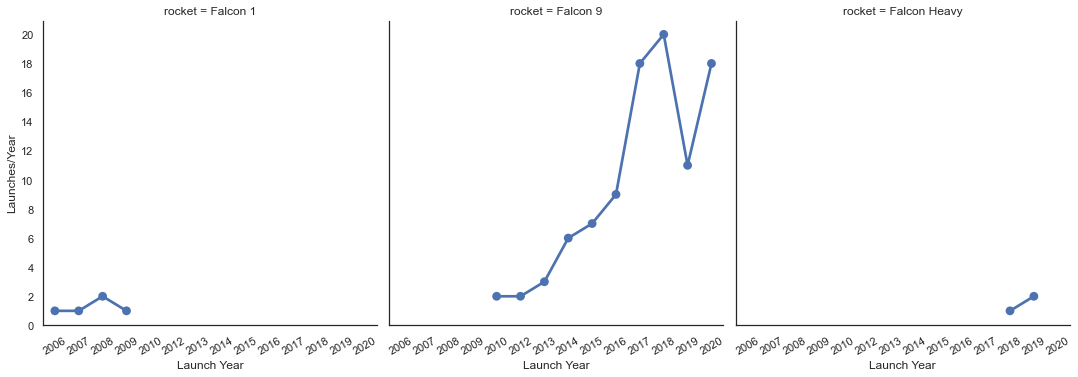

In [125]:
# Style Setting

sns.set_style('white')

# DF to visualise launch timeline

LD = pd.DataFrame(launches[['rocket','launch_year']].groupby(['launch_year','rocket']).size())
LD.reset_index(inplace = True)
LD.columns = ['launch_year','rocket','Launches/Year']
#lD

# Visualising launch timeline

f = sns.catplot(x = 'launch_year', y = 'Launches/Year',col =  'rocket',kind = 'point', data = LD)
f.set(yticks = np.arange(0,22,2), xlabel = 'Launch Year')
f.set_xticklabels(rotation = 30)


Before analyzing the above data, it would also be useful to also understand the success rate of these launches.

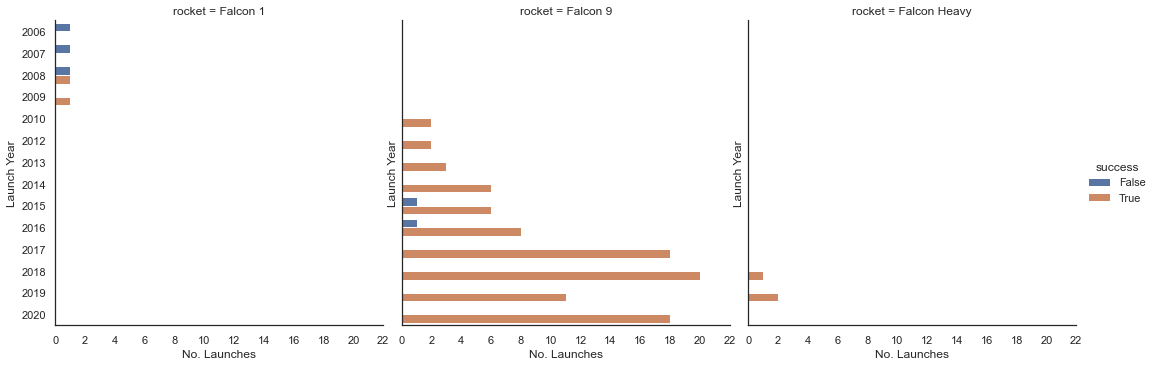

In [126]:
# Visualising Launch Perfomance

SR = sns.catplot(y ='launch_year', hue = 'success', col = 'rocket', kind = 'count', data = launches, orient  = "h")
SR.set( xticks = np.arange(0,24,2), xlabel = 'No. Launches', ylabel = 'Launch Year')


Observations: We observe that falcon 1 was used as a learning tool and after getting 2 consecutive successes in 2008 and 2009 respectively, SpaceX moved onto falcon 9 - which has pretty much been the workhorse rocket ship. The Falcon 9 has succeded in all but 2 of it's launches and has proved itself to be the go-to rocket. The falcon heavy, which is essentially 3 Falcon 9's packed together, was first launched in 2018 in a test flight and has had 4 launches until 2020.

Key points:
        
* We see two major upticks in operations: once in 2014 - when the launches doubled to 6, and the other in 2017 - which is when SpaceX really upscaled its operations, and did 18 launches.


* A significant dip in operations is observed in 2019 wherein the launch operations were nearly halved, 
   accompanied by an equally sharp rise in operations the following year. 


* From the launch success visualisation, it's evident that SpaceX has enjoyed a very high success rate.

          
          
        
          

Yet another question that comes to mind is how are SpaceX launches distributed over a year.
And if there has been a particular quarter in which SpaceX carries out most of it's launches?


To answer this, we'll first visualise the total quarterly launches and analyse the launch pattern 
in aggregate.
 

Text(0.5, 1.0, 'Quartely Aggregate Launches')

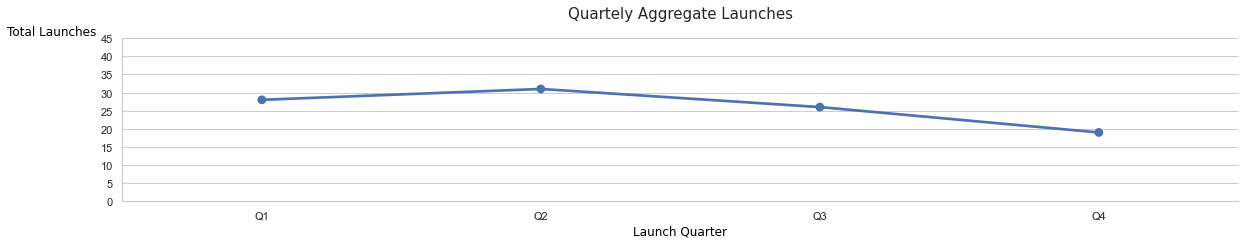

In [127]:
# DF for visualising Quarterly launch data

dfQ = launches.groupby(['launch_year','launch_quarter',]).size().unstack(0)
dfQ['quarter_total'] = dfQ.sum(axis = 1)
dfQ.loc['year_total']  = dfQ.sum(axis = 0)
dfQ

# Total Quartely launches

QT = sns.set(rc = {'figure.figsize' : (20,3)}, style = 'whitegrid')
QT = sns.pointplot( x = dfQ.index.drop('year_total'), y  = dfQ['quarter_total'].drop('year_total'))
sns.despine()

QT.set(yticks = np.arange(0,50,5))
QT.set_ylabel('Total Launches', loc = 'top', rotation = 0, fontdict = ax_font)
QT.set_xlabel('Launch Quarter', rotation = 0, fontdict = font)

QT.set_title('Quartely Aggregate Launches', fontdict = {'size' : 15, 'family' : 'Barlow', 'weight' : 'medium'} , pad = 20)

From the above graph, it seems that SpaceX carries out most of it's launches in the fist half of the year with the maximum launches happening in Q2 which is then accompanied by dip in launches in Q3 and Q4. 

It is to be noted that this is aggregate data, what we need to is to find is: if the pattern actually holds true on a yearly basis. Since most of the data in the above graph comes from the years 2017 to 2020. We'll plot the quarterly launch frequencies for these years to further understand this. 

Text(0.5, 1.0, 'Quarterly launch data from 2017 to 2020 ')

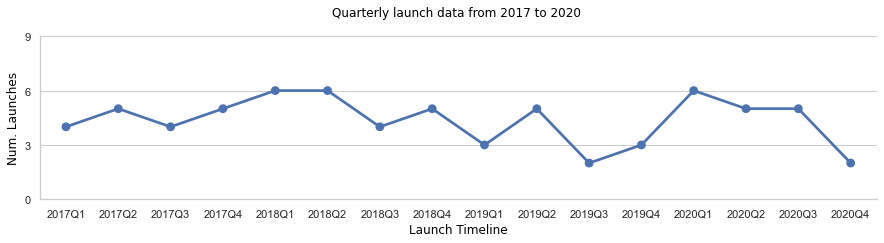

In [128]:
launcht = launches.groupby(launches.quarter).size()
launcht.index = pd.PeriodIndex(launcht.index, freq = 'Q-JAN')

sns.set_style('whitegrid')


# Quarterly launch data from 2017 to 2020 

idx = pd.period_range('2017Q1', '2020Q4', freq = 'Q-JAN')
fig, axes = plt.pyplot.subplots(figsize = (15,3))

T = sns.pointplot(x = idx , y = launcht[idx])
sns.despine()

T.set(yticks = np.arange(0,10,3))

T.set_xlabel('Launch Timeline', fontdict = font)
T.set_ylabel('Num. Launches', fontdict = font)

T.set_title('Quarterly launch data from 2017 to 2020 ', fontdict = font, pad = 20)

Alright, barring a few exceptions we observe an alternating pattern, where the launches would increase from Q1 to Q2, followed by a dip in Q3 and a rise in Q4. Overall, we observe the number of launches in second quarter is more than the number of launches in Q4. What remains interesting is despite there being fewer launches in Q3 in 2017 to 2020, the number of launches in Q3 remains more than Q4 in the aggregate data, implying little to no launches were carried out in the fourth quarter during the initial years of SpaceX.

**Key Observation**: Q2 remains the period with most launches in a year.

**Anomalies**: We see that the alternating pattern is offset at 2 places:

 * In 2018, when the launches in Q2 stayed the same as those in Q1.This, however seems to be a minor anamoly and it            would be best left out of further investigation for now.
 

 * In 2020, when the pattern was completely offset, Q2 launches dipped and stayed the same in Q3 to later decrease            in Q4. Ths most probable candidate for this offset is the manned spaceflight in 2020.

 

### Rocket Inventory Analysis

In the rocket inventory analysis, we'll explore the payload to launch-cost ratio as a metric for cost efficiency, and evaluate potential candidates for a work-horse rocket. Alternatively, we could also find dimensions for a hypothetical 
rocket ideal for repeated launches.

Before we begin, let's first define the parameters which would make a good work-horse:

1. Launch cost effciency - An ideal workhorse would give the maximum payload capacity per unit cost.
2. Reusability - Here, two things matter - number of times a rocket can be used before being dicarded, and the second - recovery rate of a particular rocket.

Since we have limited data on reusability performance, we'll be using launch cost efficiency as our primary indicator.


We'll be analyzing rocket dimensions and trying to investigate any underlying relationships that they may have with the
payload to cost ratio. Of course, there won't be any causal relationships. What we aim to do here is understand the cost efficiency of SpaceX's rocket design. And for this purpose we'll be looking at the following:
         
* How has cost efficiency changed with more powerful rockets?


* A look at the change in the rocket dimensions


* Which dimensional metric is associated with the most change in payload capacity and cost efficiency?


 

             
*It is to be noted here that Falcon 9 and Falcon heavy are closely related.*
             

#### Powerful Rockets vs Cost Efficiency

In order to measure changes in cost efficiency with the introduction of newer rockets, we'll be plotting the percentage change in payload capacity per unit dollar for each orbit system. 

<Figure size 1440x216 with 0 Axes>

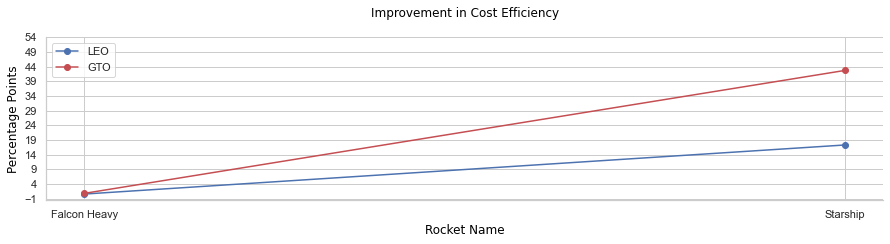

In [129]:
# Percent changes in Cost Efficiency


sup = plt.pyplot.figure()
plt.pyplot.figure(figsize = (15,3))

plt.pyplot.plot(rockets.name,rockets.payload_per_dollar_LEO.pct_change(), color = 'b', label = 'LEO', marker = 'o')
plt.pyplot.plot(rockets.name,rockets.payload_per_dollar_GTO.pct_change(), color = 'r', label = 'GTO', marker = 'o')

sns.despine()

plt.pyplot.yticks(np.arange(-1,55,5))

plt.pyplot.xlabel('Rocket Name', fontdict = font)
plt.pyplot.ylabel('Percentage Points', fontdict = font)

plt.pyplot.title('Improvement in Cost Efficiency', fontdict = font, pad = 20)
plt.pyplot.legend(loc = 'best')


plt.pyplot.show()

We observe a 44% and a 14% improvement in cost efficiency for GTO and LEO respectively on the starship rocket as compared to falcon heavy, which, had shown negligle improvements in the launch cost over falcon 9. An important thing to note here is that cost efficiency actually improved with the introduction of more powerful rockets. This hints at major design and engineering changes over simple addition of costlier parts.

Our visualisation on the changes in rocket dimension and their relationship with cost efficiency would help us further explore this insight.

#### Changes in Rocket Dimensions

Based on the data, we can work with mass, height and diameter as our primary dimensions. The idea is plot the changes in overall dimensions with the introduction of newer rocket model giving us a mental map to compare rocket sizes. 

<Figure size 1440x216 with 0 Axes>

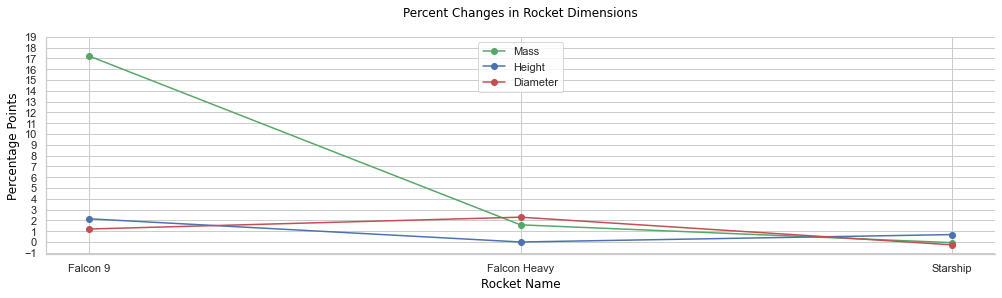

In [130]:
fig = plt.pyplot.figure()
plt.pyplot.figure(figsize = (17,4))

plt.pyplot.plot(rockets.name,rockets.mass_kg.pct_change() ,color='g', label = 'Mass', marker = 'o')
plt.pyplot.plot(rockets.name,rockets.height_mt.pct_change() ,color='b', label = 'Height', marker = 'o')
plt.pyplot.plot(rockets.name,rockets.diameter_mt.pct_change(),color='r', label = 'Diameter', marker = 'o')

sns.despine()

plt.pyplot.xlabel('Rocket Name', fontdict = font)
plt.pyplot.ylabel('Percentage Points', loc = 'center', fontdict = font)

plt.pyplot.yticks(np.arange(-1,20,1))

plt.pyplot.legend(loc = 'upper center')
plt.pyplot.title('Percent Changes in Rocket Dimensions', fontdict = font, pad = 20)


plt.pyplot.show()

Right, so we observe that Falcon 9 had a mammoth 17% increase in mass compared to its predeccessor falcon 1, which then increased by 1.5% with Falcon heavy and decreased by less than a percent in starship. The other 2 dimensions, undewent moderate changes with height increasing by 2% in Falcon 9, staying the same in Falcon heavy, and a then a 1% percent increase in starship; and diameter, increasing by 1%, then 2% and then decreasing by half a percent in starship.

Falcon heavy is simply a modified version of Falcon 9 containing a main body and 2 Falcon 9 boosters. This explains the moderate increases in mass and diameter with the same height. Starship, on the other hand is a newly engineered rocket slightly taller than Falcons and mass and diameter between Falcon 9 and Falcon heavy.

It would be worth noting the payload capacity of each of these rockets and see how the changes in dimensions hold up with them.

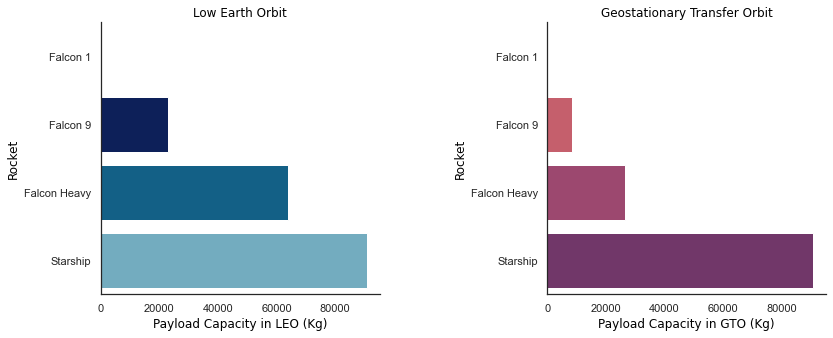

In [131]:
# Style Setting

sns.set_style('white')

# Payload Capacities

fig = plt.pyplot.figure(figsize = (13,5))

# LEO 

LEO = fig.add_subplot(1,2,1)

L = sns.barplot(x = rockets.LEO_capacity_kg, y = rockets.name, palette = 'ocean')
sns.despine()

L.set_xlabel('Payload Capacity in LEO (Kg)',fontdict = font)
L.set_ylabel('Rocket', fontdict = font)

L.set_title('Low Earth Orbit', fontdict = font)

# GTO 

GTO = fig.add_subplot(1,2,2)

G = sns.barplot(x = rockets.GTO_capacity_kg, y = rockets.name, palette = 'flare')
sns.despine()

G.set_xlabel('Payload Capacity in GTO (Kg)',fontdict = font)
G.set_ylabel('Rocket', fontdict = font)

G.set_title('Geostationary Transfer Orbit', fontdict = font)

plt.pyplot.subplots_adjust(wspace = .6)

From the above graph, it is pretty clear that the payload capacity has increased with newer models and minor tweaks in dimensions. We also observe that Falcons' payload cap is much less in GTO.   
 

An interesting bit would be understand how these dimensions would have moved with the cost efficiency metrics.
which should hopefully provide a basis for uncovering some insights on SpaceX's rocket design and engineering principles.


The following plot does exactly that. We are plotting cost_per_kg on the y axis to examine it's relationship with each of the dimensions. The cost_per_kg measures in dollars the amount of money spent on carrying a kilogram of payload to each of the orbit systems. 

#### Dimensions vs Cost Efficiency

As discussed above we'll be plotting our dimensions against cost_per_kg  in GTO. 

Additionally, we are going to focus on yet another metric viz payload fraction. It represents the payload capacity as a fraction of the total mass of the rocket. The metric is indicative of engine performance and engineering design, since a high payload fraction means greater payload capacity per unit mass of the rocket, which, is a function of engine performance.

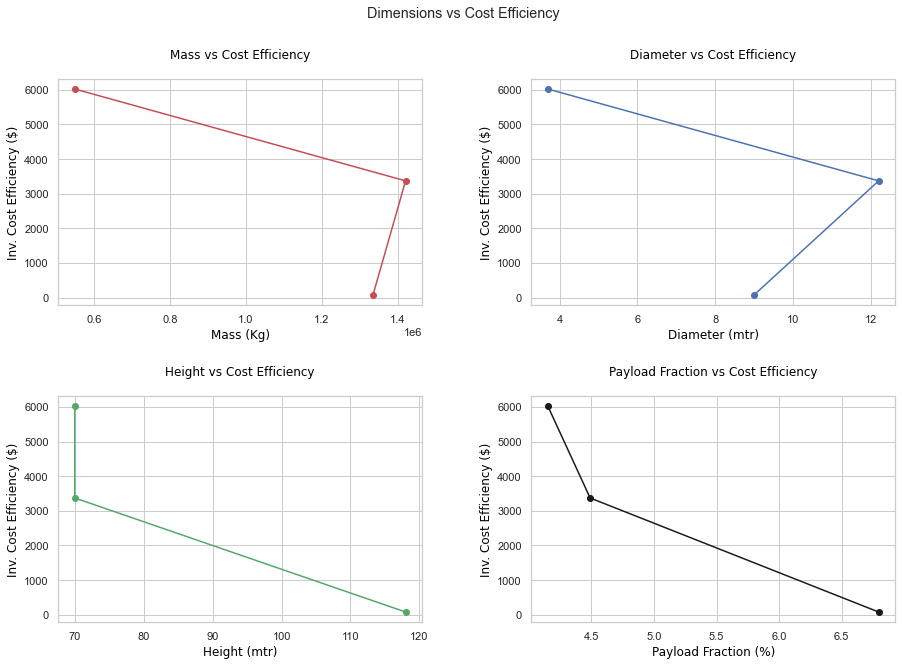

In [134]:
# Style Setting

sns.set_style('whitegrid')

# Plots

fig  = plt.pyplot.figure(figsize = (15,10))
fig.suptitle('Dimensions vs Cost Efficiency')

# Mass vs Cost Efficiency 

ax1 = fig.add_subplot(2,2,1)

plt.pyplot.plot(rockets.mass_kg, rockets.cost_per_kilo_GTO, color='r', label = 'Mass', marker = 'o')

plt.pyplot.xlabel('Mass (Kg)', fontdict = font)
plt.pyplot.ylabel('Inv. Cost Efficiency ($)', fontdict = font)

plt.pyplot.title('Mass vs Cost Efficiency', fontdict = font, pad = 20)


# Diameter vs Cost Efficiency 

ax2 = fig.add_subplot(2,2,2)

plt.pyplot.plot(rockets.diameter_mt,rockets.cost_per_kilo_GTO ,color='b', label = 'Diameter', marker = 'o')

plt.pyplot.xlabel('Diameter (mtr)', fontdict = font)
plt.pyplot.ylabel('Inv. Cost Efficiency ($)', fontdict = font)

plt.pyplot.title('Diameter vs Cost Efficiency', fontdict = font, pad = 20)

# Height vs Cost Efficiency 

ax3 = fig.add_subplot(2,2,3)

plt.pyplot.plot(rockets.height_mt,rockets.cost_per_kilo_GTO,color='g', label = 'Height', marker = 'o')

plt.pyplot.xlabel('Height (mtr)', fontdict = font)
plt.pyplot.ylabel('Inv. Cost Efficiency ($)', fontdict = font)

plt.pyplot.title('Height vs Cost Efficiency', fontdict = font, pad = 20)

# Payload Fraction vs Cost Efficiency 

ax4 = fig.add_subplot(2,2,4)

plt.pyplot.plot(rockets.payload_pct_mass_kg_LEO, rockets.cost_per_kilo_GTO ,color='k',label = 'Payload Fraction', 
                marker = 'o')

plt.pyplot.xlabel('Payload Fraction (%)', fontdict = font)
plt.pyplot.ylabel('Inv. Cost Efficiency ($)', fontdict = font)

plt.pyplot.title('Payload Fraction vs Cost Efficiency', fontdict = font, pad = 20)


plt.pyplot.subplots_adjust(wspace = 0.3, hspace = 0.4)

In all the above graphs. the first point represents Falcon 9, the second - Falcon Heavy, and third - Starship

We observe that cost efficiency has improved as new models were introduced. Starship has shown the greatest improvement in cost efficiency with unit cost of less than $1000 - An improvement of nearly 3000 dollars. 

While we have already discussed the movement of the first 3 dimensions, it is remarkable that starship has managed to signigicantly reduce the unit cost of payload, and increase the payload fraction to 7.2%.


Finally, let's look at overall cost of launching a type of rocket alongside their payload capacities to give ourselves a snapshot of the analysis and also check for any numerical triviality.  

#### Launch Cost

In [135]:
# Rocket Launch Cost

Rockets = rockets.copy()

Rockets.cost_per_launch = Rockets.cost_per_launch.div(10**6).astype('str') + ' million'
Rockets.LEO_capacity_kg = Rockets.LEO_capacity_kg.dropna().astype('str') + ' Kg'
Rockets.GTO_capacity_kg = Rockets.GTO_capacity_kg.dropna().astype('str') + ' Kg'

Rockets.rename(columns = {'name': 'Rocket',
                          'cost_per_launch' : 'Launch Cost',
                          'LEO_capacity_kg' : 'LEO Capacity',
                           'GTO_capacity_kg' : 'GTO Capacity'},
                           inplace = True )

Rockets.index = Rockets.Rocket


Rockets[['Launch Cost','LEO Capacity','GTO Capacity']]

,Launch Cost,LEO Capacity,GTO Capacity
Rocket,,,
Falcon 1,6.7 million,NaN,NaN
Falcon 9,50.0 million,22800.0 Kg,8300.0 Kg
Falcon Heavy,90.0 million,63800.0 Kg,26700.0 Kg
Starship,7.0 million,90718.0 Kg,90718.0 Kg


From the above table - starship clearly stands out. It's cost is comparable to that of Falcon 1's and has the highest payload capacity of all the rockets. 

We'll be using these insights in the final section. Next we move onto analysing SpaceX's customer demographic and payload data.

### Customer Demographics & Payloads

In this section, we'll look at the major clientele of SpaceX in terms of individual customers and customer classes.

Firstly, we'll look at the top clients of SpaceX and lookout for any major customers. We hope to get a fair understanding of the distribution of SpaceX's clientele. After that, we'll study the average payload requirements of SpaceX's top customers both indivisually, and in terms of classes.

#### SpaceX - Major Clientele

This section deals with extracting the top customers of SpaceX in terms of number of orders and lookout for any major clients. 

Text(0.5, 1.0, 'SpaceX - Major Clientele')

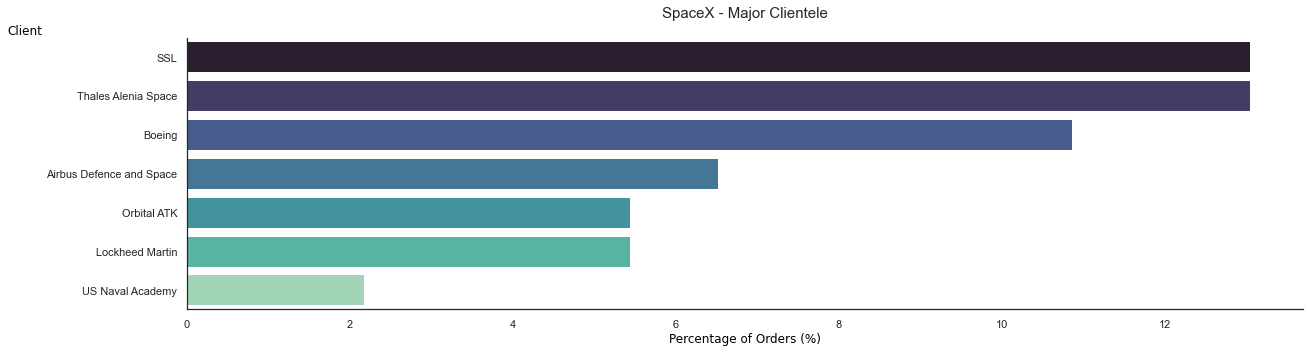

In [136]:
# Style Setting

sns.set(rc = {'figure.figsize': (20,5)}, style = 'white' )

# Creating Manufacturer list

Mft = []
payloads.manufacturers.apply(clean_seq)

for val in payloads.manufacturers.apply(clean_seq):
    Mft.append(val[0])
 
    
MFT = pd.DataFrame(Mft, columns = ['Manufacturers']).replace('','Unknown')
#MFT

# Finding Total Number of Orders 

num_mfts =  len(MFT.where(MFT.Manufacturers != 'SpaceX').dropna())

# SpaceX - Major Clientele

c = sns.barplot( y = MFT.Manufacturers.value_counts().drop(['SpaceX','Unknown'])[:7].index, 
                 x = np.multiply(np.divide(MFT.Manufacturers.value_counts().drop(['SpaceX','Unknown'])[:7].values,num_mfts),100),
                 palette = 'mako'
                ) 
sns.despine()

c.set_xlabel('Percentage of Orders (%)', fontdict = font)
c.set_ylabel('Client',rotation = 0, loc = 'top', fontdict = font)

c.set_title('SpaceX - Major Clientele', fontdict = {'size' : 15}, pad = 20)

As we observe, Thales Alenia Space & SSL are customers with the most orders having 13% each of the total number of orders placed by SpaceX's clients. These include orders by the US and other foreign governments but not paylaods from SpaceX itself. The next major client is Boeing with 11% orders followed by Airbus Defence & Space, Lockheed Martin and Orbital ATK with 7%, 5%, and 5% of order respectively, with other clients indivisually contributing less than 5% of orders. 

From this, we can say that SpaceX customer base is fairly diversified. The top three clients which have a significantly higher percentage of orders deserve some further study in assesing them for their potential to provide long term business which we'll explore in a later section.


Here, we have just worked with indivisual customers, but government contracts happen to be frequently reported as a major SpaceX customer, and thus it would be be a good idea to study the customer base in terms of customer class viz, Private, US governement, Foreign government. That should tell us the role of the government enterprises in the SpaceX business. 

The next section dwelves into customer diversity in terms of customer classes.



#### Customer Diversity of SpaceX


Text(0.5, 1.0, 'Customer Diversity of SpaceX')

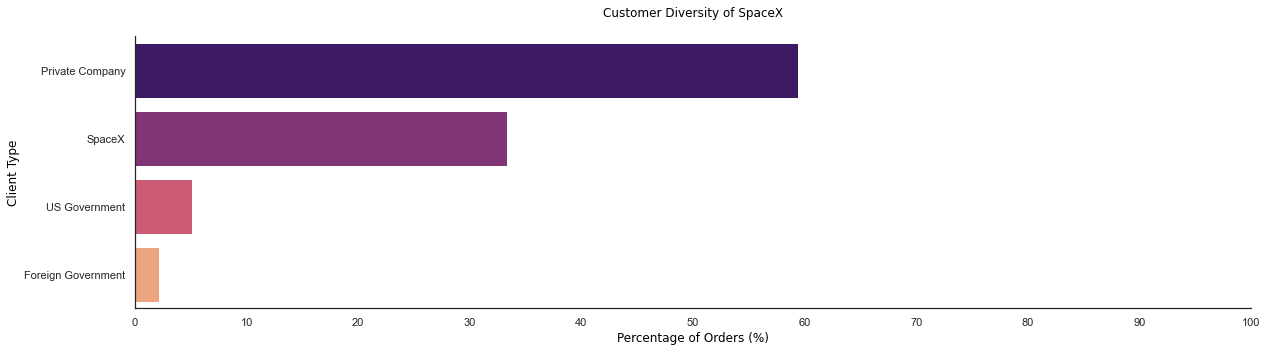

In [137]:
# Style Setting

sns.set_style('white')

# Diversity of SpaceX

orders = np.sum(MFT.Manufacturers.dropna().apply(class1).value_counts().values)

C = sns.barplot(x = np.multiply(np.divide(MFT.Manufacturers.dropna().apply(class1).value_counts().values,orders),100),
                y = MFT.Manufacturers.dropna().apply(class1).value_counts().index,
                palette = 'magma'
                )
sns.despine()

C.set(xticks = np.arange(0,110,10))
C.set_xticklabels(np.arange(0,110,10))

C.set_ylabel('Client Type',fontdict = font)
C.set_xlabel('Percentage of Orders (%)', fontdict = font)

C.set_title('Customer Diversity of SpaceX', fontdict = font, pad = 20)

We see that the US government constitutes just 5% of the satellite launches, with private companies constituting 60% followed by SpaceX at 35%. It should be noted here that the US governement category exclusively contains defence and research satellites, the space operations funded by NASA is manufactured by SpaceX and thus would appear in SpaceX's numbers. 

In general, it seems that private companies are the major clients in terms of income from satellite launches. NASA, and other government organisation do have a significant part in SpaceX's operating finances and, as hinted by the above graph, those contributions would probably come as long term contracts that enable SpaceX to carry out its operations. 

Before moving on the conclusions, let us also try and understand the general requirements of these customers in terms of mass, reference system and orbit. The approach would be exactly the same as this section wherein we'll first look at cusomters indivisually, and then as classes. 


#### Major Requirements


Here, we'll look at client wise general satellite conifigurations in two ways.     


**Indivisual Customers**

In [138]:
# Indivisual Customers

customer_requirement = pd.DataFrame({
                                       'mass_kg' : None,
                                       'reference_system' : None,
                                       'orbit' : None,
                                       'regime' : None 
                                                         }, 
                                        index = payloads.manufacturers.value_counts().drop(['SpaceX', ''])[:5].index )

for client in customer_requirement.index:
    for requirement in ['mass_kg','reference_system','orbit','regime']:
        
        if requirement == 'mass_kg':
            
            customer_requirement.loc[client,requirement] = payloads[requirement].where(payloads['manufacturers'] == client).dropna().mean()
            
        else:
             customer_requirement.loc[client,requirement] = payloads[requirement].where(payloads['manufacturers'] == client).dropna().value_counts()[:1].index[0]


customer_requirement.rename( columns = {
                                         'mass_kg' : 'Average Mass',
                                         'reference_system': 'Main Reference Sytem',
                                         'orbit' : 'Main Orbit',
                                         'regime' : 'Main Regime',},
                                          inplace = True)

customer_requirement

,Average Mass,Main Reference Sytem,Main Orbit,Main Regime
SSL,4708,geocentric,GTO,geostationary
Thales Alenia Space,7017.5,geocentric,PO,low-earth
Boeing,3216.6,geocentric,GTO,geostationary
Airbus Defence and Space,4298.14,geocentric,GTO,geostationary
Orbital ATK,2835,geocentric,GTO,geostationary


The table above gives us a very good summary of the requirements of SpaceX's major clients. Among the top 5 clients, we observe geocentric as the main reference system, GTO as the main orbit, and geostationary as the main regime. 

It is to be noted that Thales Alenia Space has Polar Orbit as its most frequent orbit with a low_earth regime; it also has the highest mass viz. 7017.5 Kg amongst the top clients. Given that it covers 13% of the market share, it is worth looking into the type of satellites that this company sends up in order to better understand it as a customer.

The next code cell looks at the satellites launched by Thales Alenia Space.

In [145]:
thales_sat  = pd.DataFrame( {
 'Major Payloads of Thales Alenia Space' : payloads.name.where(payloads.manufacturers == 'Thales Alenia Space').dropna()
                             })

thales_sat.index  = range(len(thales_sat))
thales_sat

,Major Payloads of Thales Alenia Space
0,TürkmenÄlem 52°E / MonacoSAT
1,Jason-3
2,Iridium NEXT 1
3,Iridium NEXT 2
4,Iridium NEXT 3
5,KoreaSat 5A
6,Iridium NEXT 4
7,Iridium NEXT 5
8,Bangabandhu-1
9,Iridium NEXT 6


As seen above, Iridium Next happens to be the major satellite class of Thales Alenia Space. Iridium Next is a contellation of communication satellites built for the european space agency. Reference: https://earth.esa.int/web/eoportal/satellite-missions/i/iridium-next . This means that Thales Alenia Space is a strong candidate for a repeat customer.  

Another major client is SSL. The next code cell lists out the satellites it sends to space. 

In [146]:
SSL_sat = pd.DataFrame({
         'Major Payloads of SSL' : payloads.name.where(payloads.manufacturers == 'SSL').dropna()
                       })

SSL_sat.index  = range(len(SSL_sat))
SSL_sat

,Major Payloads of SSL
0,AsiaSat 8
1,AsiaSat 6
2,JCSAT-2B
3,JCSAT-16
4,BulgariaSat-1
5,Hispasat 30W-6
6,Telstar 19V
7,Telkom-4
8,Telstar 18V
9,Nusantara Satu (PSN-6)


As for SSL, it seems as if they have a wide range of satelites sent into orbit which makes it a less desirable prospect as a repeat customer.The others seem to have fairly similar payload requirements. Let us now dive into the requirements by customer classes.

**Customer Classes**

In [141]:
# Customer Classes 

class_requirement = pd.DataFrame({
                                       'mass_kg' : None,
                                       'reference_system' : None,
                                       'orbit' : None,
                                       'regime' : None 
                                                         }, 
                                        index = payloads.customer_class.unique() )

for client_class in class_requirement.index:
    for requirement in ['mass_kg','reference_system','orbit','regime']:
        
        if requirement == 'mass_kg':
            
            class_requirement.loc[client_class,requirement] = payloads[requirement].where(payloads['customer_class'] == client_class).dropna().mean()
            
        else:
             class_requirement.loc[client_class,requirement] = payloads[requirement].where(payloads['customer_class'] == client_class).dropna().value_counts()[:1].index[0]
                
class_requirement.rename( columns = {
                                         'mass_kg' : 'Average Mass',
                                         'reference_system': 'Main Reference Sytem',
                                         'orbit' : 'Main Orbit',
                                         'regime' : 'Main Regime',},
                                          inplace = True)

class_requirement.drop('Unknown',axis = 0)                

,Average Mass,Main Reference Sytem,Main Orbit,Main Regime
Private Company,3640.04,geocentric,GTO,geostationary
SpaceX,6912.99,geocentric,ISS,low-earth
Foreign Government,2976.67,geocentric,SSO,sun-synchronous
US Government,260.5,geocentric,LEO,low-earth


Here we observe that each customer class has a different main orbit and regime requirement. By 'main' we refer to the most frequently occuring values in that particular category.

Private companies have the GTO as their main orbit, while SpaceX has the ISS as its main orbit - this could be mainly because of the Dragon programme as part of its work as crew resupply vehicle to the ISS. 

Since, foreign governments constitute just 2% of the orders, we can safely overlook them for now. 

The US government on average sends the lightest payloads to orbit. LEO with the low-earth regime with a mass of 260 kg is their main requirement

In this upcoming section, we'll be digging deeper into the satellites carried up by SpaceX  and begin to answer the questions we posed to ourselves in the begining of the exploration stage.

##  Final Insights

In this section, we return to the questions we posed ourselves during the exploration stage and answer them with additional insights wherever possible. Using our findings as a base, we'll refer to related blog posts, articles and solidify our understanding of that section.     

In order to maintian readability, we'll be answering these questions in order.

In what year did SpaceX amp up its operations?
How are launches spaced out in a year? Is there a season with most most launches? If yes, explore.
Which rockets have the potential to be SpaceX's workhorse in the coming future?
Can SpaceX optimize it's payload capacity and cost per launch? if yes, how?
What are the general payload requirements of SpaceX's major customers ( including itself) in terms of mass, reference system and orbit?
Repeat customers vs Diversification : What would be better in the long run?

#### In what year did SpaceX amp up its operations?

Basis our analysis, it is evident that SpaceX amped up its operations in the year 2017 wherein it had doubled its launch operations to 18 launches in that year. Let's explore the possible reasons behind this.

After referring to the following article by the Atlantic: https://www.theatlantic.com/science/archive/2017/12/spacex-launch-falcon-heavy. We note the following:

SpaceX was responsible for carrying commercial satellites,supplies to the international space station and some secret government missions. It was a year with one succesfull launch after another and zero mishaps. 

In the month of March, SpaceX reused a falcon 9 first stage in one of its launches of the commercial satellites. And in November, NASA permitted them to reuse rockets parts in their resupply missions. 

In my opinion, the reusing of Falcon 9's first stage enabled SpaceX to reduce the time take taken between launches as refurburshing a used part would take considerably less than time than building a new one. This coupled with the streak of succesfull launches meant thet SpaceX was able to double its launches in 2017. 


#### How are launches spaced out in a year? Is there a season with most most launches? If yes, explore.

Since 2017, the launches have shown to follow an oscillating pattern, with the second quarter having the most number of launches in aggreagate. The second quarter corresponds to the summer season.

The following document by NASA enlists the 14 weather criteria that determines the fate of a planned launch. This was specifically designed for the crew dragon launch but would give us a general idea of the weather monitoring that goes behind a  succesfull launch. The document: https://www.nasa.gov/sites/default/files/atoms/files/falcon9_crewdragon_launch_weather_criteria_fact_sheet.pdf

Basis the article, it seems that the ideal condition for a rocket launch involve a breezy, consistent wind conditions with no wind shear. Thunderstorms and cloudy weather seem to be the main causes for scrubbing  a launch.

The months in the second quarter lay in the spring season and the onset of summer, the whole period is categorized by pleasant weather conditions with moderate winds and clear skies and while rain is common during this period, the general conditions would probably make this quarter most suitable for rocket launches.

#### Which rockets have the potential to be SpaceX's workhorse in the coming future?

In our analysis, it was pretty clear that SpaceX managed to improve the cost efficiency of its rockets with newer models.
Starship is clearly standouts in terms of payload capacity, building cost, cost efficiency, and engine performance. 

Falcon heavy - also has shown significant imporvement as compared to Falcon 9 relying solely on good design. 

Let's now dwelve deeper into the rockets and try and understand their design. We'll be refrerring to the following: https://www.spacex.com/vehicles

After reading through the information for each of the vehicles, we find starship is built out of completely different materials and has a different engine altogether. And the core concept behind Falcon heavy is attaching two Falcon 9 boosters to the main body giving it the power of 27 Merlin engines with neglible increase in mass thus significantly improving its payload capacity as well as launch cost efficiency. 

Starship uses a version of stainless steel which is known for its low cost as compared to the carbon fibre used in Falcons, apart from this, it has better heat bearing capacity than carbon fibre which is essential in good reusability performace. 
The raptor is a more powerful engine, as compared to the merlin, and while it costs more than Merlin, it makes up for it with high cost efficiency. The major improvements in cost efficiency, and payload fraction are due to these changes. It is to be noted that Starship is the first of its class with plans to develop more powerful versions of the same. 

Coming to the question of a future workhorse, starship seems to be ideal candidate for the same, and was also designed to be so. However, given the significant imporvements in the cost efficiency metric, and the payload fraction due the raptor engine and the stainless steal, there is room for a lighter version of Starship which may have lower payload capacity and cost effectiveness but would cost much less to launch and relaunch. This lighter version of the Starship could be useful as a workhorse for delivering payloads to low earth orbit

####  What are the general payload requirements of SpaceX's major customers ( including itself) in terms of mass, reference system and orbit?

The general requirements of SpaceX's major customers were discussed at length in the analysis section, and would be sufficient answer to this question. 

#### Repeat customers vs Diversification : What would be better in the long run?

SpaceX currently relies heavily on NASA contacts with the crew resupply missions and would continue to do so for quite some time. From analysing SpaceX's customer base for satellites, we found that Thales Alenia Space could be a good canididate for repeat business as it would be setting the Iridium next contellation. 

SpaceX is already working on setting up the Starlink constellation which, once active, will be a solid source of revenue. 
Up until then, SpaceX could explore building strong relations with companies like Thales and SSL, and other companies that deal in research and communication satellites with a view to build more business from them and reduce its reliance on the government.  These companies can continue to be a source of revenue after the Starlink has been deployed, and also might be able to help SpaceX in providing relevant data for its more ambitious projects. 

Thus, repeat customers would be better for SpaceX's business in the long run.